In [35]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Projects\Bloom\Period tracker - ml\period_tracker_dataset.csv")

# Display first 5 rows
print(df.head())


     previous_cycle_lengths    period_durations  period_duration_mean  \
0  [38, 33, 43, 32, 35, 44]  [6, 3, 5, 7, 5, 3]                  4.83   
1  [26, 26, 23, 23, 22, 25]  [7, 6, 6, 7, 6, 7]                  6.50   
2  [39, 43, 25, 25, 23, 22]  [7, 5, 5, 5, 7, 4]                  5.50   
3  [26, 38, 33, 35, 23, 35]  [3, 4, 5, 4, 4, 4]                  4.00   
4  [22, 44, 24, 22, 32, 39]  [4, 4, 7, 5, 3, 6]                  4.83   

   days_since_last_period       stress_levels   nutrition_quality  irregular  \
0                       7  [1, 5, 1, 5, 1, 4]  [5, 4, 4, 5, 3, 2]       True   
1                      23  [3, 1, 5, 5, 5, 4]  [4, 4, 4, 3, 5, 3]       True   
2                      14  [4, 4, 5, 5, 1, 2]  [3, 3, 4, 5, 2, 4]       True   
3                      24  [5, 4, 2, 5, 1, 4]  [5, 1, 4, 5, 1, 5]       True   
4                      11  [3, 1, 2, 4, 4, 3]  [5, 1, 3, 5, 5, 5]       True   

   days_until_next_period  
0                      30  
1                       

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Mehak\AppData\Local\Temp\ipykernel_1784\2257741630.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Bloom\Period tracker - ml\period_tracker_dataset.csv")


In [3]:
print(df.info())
print(df.describe())


     previous_cycle_lengths    period_durations  period_duration_mean  \
0  [38, 33, 43, 32, 35, 44]  [6, 3, 5, 7, 5, 3]                  4.83   
1  [26, 26, 23, 23, 22, 25]  [7, 6, 6, 7, 6, 7]                  6.50   
2  [39, 43, 25, 25, 23, 22]  [7, 5, 5, 5, 7, 4]                  5.50   
3  [26, 38, 33, 35, 23, 35]  [3, 4, 5, 4, 4, 4]                  4.00   
4  [22, 44, 24, 22, 32, 39]  [4, 4, 7, 5, 3, 6]                  4.83   

   days_since_last_period       stress_levels   nutrition_quality  irregular  \
0                       7  [1, 5, 1, 5, 1, 4]  [5, 4, 4, 5, 3, 2]       True   
1                      23  [3, 1, 5, 5, 5, 4]  [4, 4, 4, 3, 5, 3]       True   
2                      14  [4, 4, 5, 5, 1, 2]  [3, 3, 4, 5, 2, 4]       True   
3                      24  [5, 4, 2, 5, 1, 4]  [5, 1, 4, 5, 1, 5]       True   
4                      11  [3, 1, 2, 4, 4, 3]  [5, 1, 3, 5, 5, 5]       True   

   days_until_next_period  
0                      30  
1                       

In [4]:
print(df.isnull().sum())

previous_cycle_lengths    0
period_durations          0
period_duration_mean      0
days_since_last_period    0
stress_levels             0
nutrition_quality         0
irregular                 0
days_until_next_period    0
dtype: int64


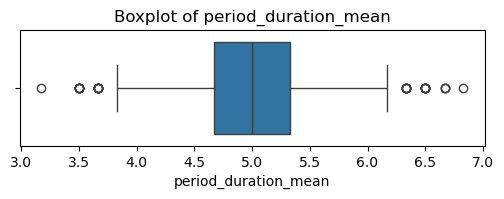

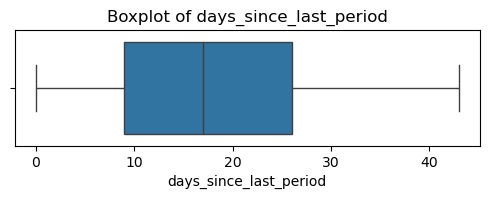

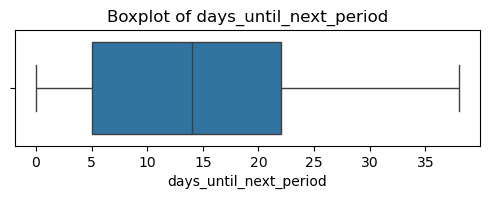

In [5]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [6]:
df['irregular'] = df['irregular'].map({True: 1, False: 0})

In [7]:
# Extract features from list-like columns (mean of each array column)
df['cycle_length_mean'] = df['previous_cycle_lengths'].apply(lambda x: np.mean(eval(x)))
df['period_duration_avg'] = df['period_durations'].apply(lambda x: np.mean(eval(x)))
df['stress_mean'] = df['stress_levels'].apply(lambda x: np.mean(eval(x)))
df['nutrition_mean'] = df['nutrition_quality'].apply(lambda x: np.mean(eval(x)))

In [8]:
df['stress_period_interaction'] = df['period_duration_mean'] * df['stress_mean']
df['nutrition_period_interaction'] = df['period_duration_mean'] * df['nutrition_mean']


In [9]:
# Select features and target
features = [
    'cycle_length_mean',
    'period_duration_avg',
    'days_since_last_period',
    'irregular',
    'stress_period_interaction',
    'nutrition_period_interaction'
]

X = df[features]
y = df['days_until_next_period']


In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,colsample_bytree=0.8)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.6577774623967707
R² Score: 0.991012692451477


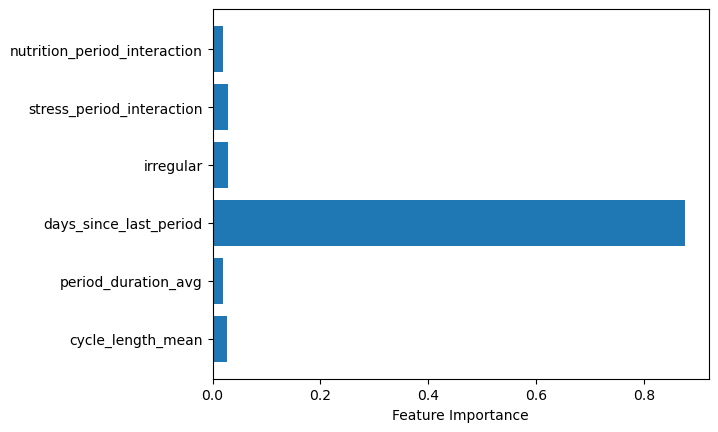

In [13]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)


Cross-validated R² scores: [0.96533549 0.98740977 0.99466115 0.99489677 0.995287  ]


In [15]:
print(y_pred)

[ 2.78652096e+01  2.26546040e+01  2.42276745e+01  2.44432220e+01
  1.60495644e+01  8.76589870e+00  2.64053860e+01  1.02879648e+01
  9.07310200e+00  1.21754479e+00  2.14673882e+01  2.30730457e+01
  3.24992204e+00  1.39957285e+01  2.79422775e-02  5.16347647e+00
  4.67086267e+00  1.79534101e+00  2.84921761e+01  7.90724373e+00
  2.86093636e+01  3.27427826e+01  2.10639706e+01  3.42730069e+00
  1.08831272e+01  2.55634785e+01  1.79655037e+01  1.47198403e+00
  2.79295044e+01  1.42507658e+01  2.90543480e+01  1.69656467e+01
  4.05417299e+00  1.75100136e+01  1.43106365e+01  2.52230301e+01
  1.69878178e+01  1.44751320e+01  2.21033058e+01  6.86130142e+00
  2.14122715e+01  1.03444777e+01  9.82456112e+00  3.60449243e+00
  1.21559734e+01  2.04257355e+01  1.19541941e+01  1.01348028e+01
  9.23996449e+00  2.15897846e+01  1.84004459e+01  1.73631554e+01
  5.48978448e-01  6.37170672e-01  2.72884903e+01  9.13787127e-01
  3.02898693e+01  6.87086058e+00  2.87391033e+01  2.47585316e+01
  2.48989334e+01  1.86146

In [31]:
y_pred_int = y_pred.astype(int)
print(y_pred_int)


[27 22 24 24 16  8 26 10  9  1 21 23  3 13  0  5  4  1 28  7 28 32 21  3
 10 25 17  1 27 14 29 16  4 17 14 25 16 14 22  6 21 10  9  3 12 20 11 10
  9 21 18 17  0  0 27  0 30  6 28 24 24 18 10 18 19 28 26 25 24  6 19  1
 15 25 31 30  5 15  9 19 12 19  5 30  0 28 23  3 16 20 20 25  2  2  7  8
 10 12  1  2 10 22 20 11 22 28  9 19 15 23  1 29 28  9 17  8 30  2  0 31
  6  0  0 15  1 24  1  5 12 17 23 22  3 29 29 28 23  6  7  1  0 22 12 25
  1 18 28 30  8 11 25  6 12 25 12 11 20  9  6  6 11 13  4 18  9 24 11  2
  8 15 10 25 13  5 22 16  0 29 19  5 11  6 12 10 20  4 28 22 14  0 10 14
 20 31 28  6  0  9 11 26]


In [33]:
model.save_model("menstrualcyclelen.json")

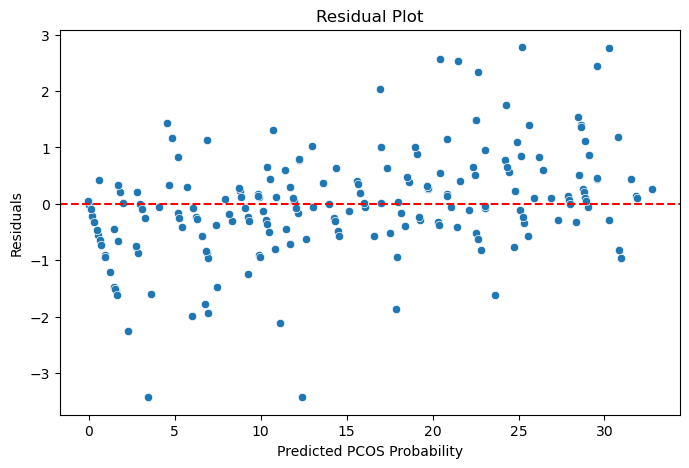

In [37]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted PCOS Probability")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


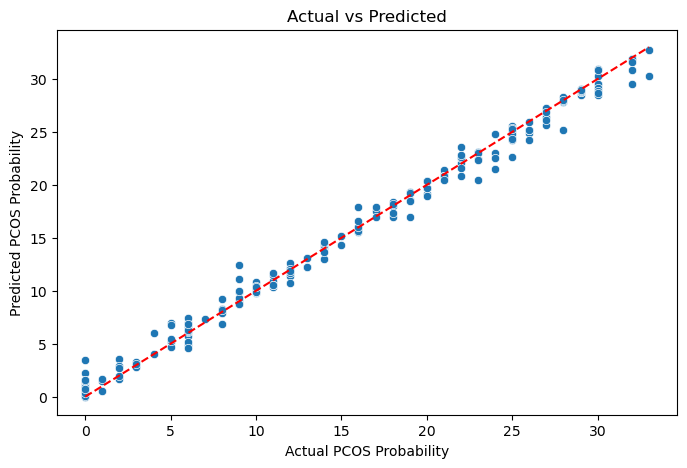

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual PCOS Probability")
plt.ylabel("Predicted PCOS Probability")
plt.title("Actual vs Predicted")
plt.show()


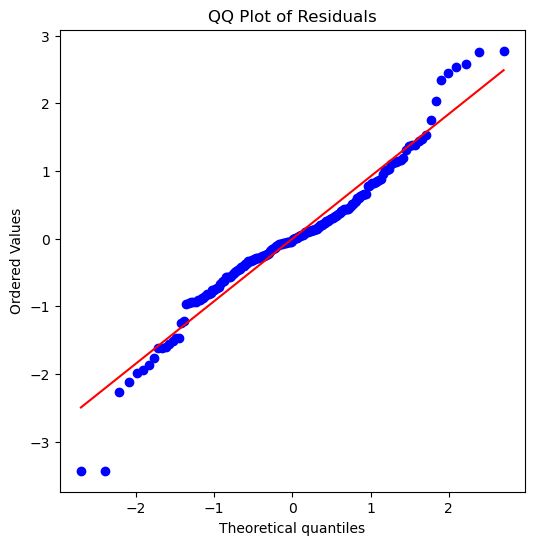

In [39]:
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()


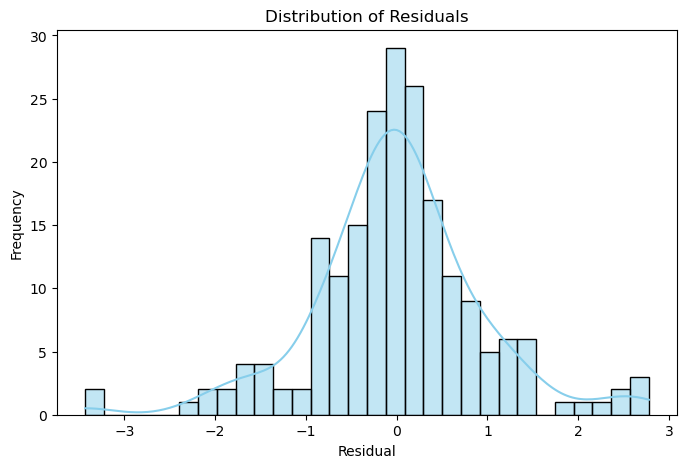

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
